<a href="https://colab.research.google.com/github/4entertainment/nlp_works/blob/main/word2vec_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **word2vec model with gensim library**

# first part: model&vector

In [1]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open('/content/sample_data/hurriyet.txt','r', encoding='utf8' )
text = f.read()
# reading .txt dataset

In [4]:
t_list = text.split('\n')
# in hurriyet.txt, sentences seperated with '\n' characters. doing this for seperate sentences in corpus

corpus = []
for sentence in t_list:
  corpus.append(sentence.split())
# every loop, we get one sentence. words in sentence, seperated with split() and adding to the corpus list.
# words have tokens and tokenized words adding to the corpus.

In [6]:
print(corpus[:10])
# looking at the top 10 sentence in corpus

[['iran', 'devlet', 'televizyonu', 'ülkedeki', 'eyaletin', 'sinde', 'yapılan', 'reformcuları', 'protesto', 'amaçlı', 'yürüyüşlere', 'milyonlarca', 'kişinin', 'katıldığını', 'bildirdi'], ['gösterilerde', 'fitnecilere', 'ölüm', 'münafıklara', 'ölüm', 'abd', 'ye', 'ölüm', 'ingiltere', 'ye', 'ölüm', 'sloganları', 'atıldı'], ['dini', 'lider', 'ali', 'hamaney', 've', 'cumhurbaşkanı', 'mahmud', 'ahmedinejad', 'ı', 'destekleyen', 'iranlılar', 'son', 'olaylarda', 'yeğeni', 'öldürülen', 'mir', 'hüseyin', 'musevi', 'başta', 'olmak', 'üzere', 'muhalefet', 'liderlerini', 'kınadılar'], ['musevi', 'ye', 'ölüm', 've', 'idam', 'idam', 'sloganları', 'duyuldu'], ['muhalefet', 'liderleri', 'kaçtı', 'mı', 'aşure', 'günü', 'yaşanan', 'çatışmalarda', 'devlet', 'kaynaklarına', 'göre', 'u', 'terörist', 'olmak', 'üzere', 'kişi', 'ölmüştü'], ['den', 'fazla', 'kişinin', 'yaralandığı', 'olaylar', 'sırasında', 'en', 'az', 'kişi', 'tutuklanmıştı'], ['öte', 'yandan', 'iran', 'haber', 'ajansı', 'irna', 'muhalif', 'lid

In [9]:
# model training
model = Word2Vec(corpus, vector_size = 100, window = 5, min_count = 5, sg=1)
# corpus is the tokens for training
# vector_size = 100 is the word vectors' length(size)
# window = 5 is the window words for center word
# with the # min_count = 5 parameter, we get the words that are mentioned in the corpus at least 5 times
# sg=1 is the skipgram algorithm usage. default is the CBOW algorithm.

In [11]:
model.wv['izmir']
# looking at what is in model. looking at the 'izmir' vector.
# wv is the shortcut of the wordvector
# 'izmir' vector is stored as numpy array with 100 vector size.

array([-0.00438808,  0.20127206,  0.18963122,  0.06241471,  0.08554225,
       -0.2462995 , -0.04536044,  0.35806847, -0.08118525, -0.17806593,
       -0.00523561, -0.17235513, -0.2721355 ,  0.17545274,  0.05960625,
       -0.07882903, -0.0128539 , -0.15427288,  0.02636031, -0.26481992,
        0.15749645, -0.00878973,  0.13120422, -0.16711278, -0.05513706,
        0.09914296, -0.18024632,  0.08393726, -0.08893581,  0.03318792,
        0.17369847, -0.09758963,  0.05494471, -0.08471146, -0.04888723,
        0.07378121,  0.03389489, -0.03501828, -0.1446878 , -0.16455935,
        0.0755985 , -0.20361495, -0.06423069,  0.04757376,  0.20780066,
       -0.0449911 , -0.15261315,  0.10944349,  0.15335827,  0.0836935 ,
        0.16657877, -0.1215912 , -0.07922037,  0.01809595, -0.1143098 ,
        0.19572312,  0.06859846, -0.05237965, -0.11053339, -0.1067572 ,
       -0.08232542,  0.09210307, -0.00464986,  0.06272619, -0.24925196,
        0.18052073, -0.03950705,  0.09839243, -0.08622036,  0.18

In [15]:
model.wv.most_similar('kanada')
# looking at the similar vectors for given vectors
# used for 'kanada' vector. getting similar countries to 'kanada'
# output is a list with 10 elements. elements of list are tuple data types.
# in tuples, there are similar country names to 'ispanya'. and similarity point to 2 elements.
#

[('avustralya', 0.9472141265869141),
 ('japonya', 0.9371785521507263),
 ('romanya', 0.9360144734382629),
 ('polonya', 0.934188723564148),
 ('hollanda', 0.9292877912521362),
 ('endonezya', 0.9207500219345093),
 ('meksika', 0.920100748538971),
 ('brezilya', 0.9142681956291199),
 ('küba', 0.9017983675003052),
 ('belçika', 0.8991582989692688)]

In [19]:
# another example:
model.wv.most_similar('pazartesi')

[('perşembe', 0.9766258597373962),
 ('cuma', 0.958622932434082),
 ('salı', 0.9520052075386047),
 ('pazar', 0.941247820854187),
 ('akşamı', 0.937641441822052),
 ('noel', 0.9253467917442322),
 ('gecesi', 0.9241012930870056),
 ('turu', 0.9236829876899719),
 ('çarşamba', 0.9215294122695923),
 ('sabahı', 0.920436680316925)]

In [23]:
# another example:
model.wv.most_similar('akşam')

[('saatlerinde', 0.9221928715705872),
 ('sabah', 0.9051722288131714),
 ('gece', 0.9048231244087219),
 ('pazartesi', 0.8920698761940002),
 ('öğle', 0.8869490623474121),
 ('saatle', 0.8830459117889404),
 ('perşembe', 0.8807395100593567),
 ('cuma', 0.8797317743301392),
 ('akşamı', 0.8727474212646484),
 ('günlük', 0.8704431056976318)]

In [24]:
# saving and loading the model
model.save('word2vec.model') # saves the local path in colab
model = Word2Vec.load('word2vec.model')

# Using TSNE and Graphing Vectors in Project

In [43]:
# the function gets model and the searching word for fin the closes ones to this word.
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0, 100))
    word_labels = [word]

    close_words = model.wv.most_similar(word)

    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)

    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)

    perplexity = min(30, word_vectors.shape[0] - 1)  # Calculate perplexity dynamically

    tsne = TSNE(random_state=0, perplexity=perplexity)  # Pass perplexity to TSNE
    Y = tsne.fit_transform(word_vectors)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')

    plt.show()

'''
The provided code defines a Python function named closestwords_tsneplot which takes as input a Word2Vec model and a target word.
The function aims to visualize the semantic similarity of the target word and its closest words in a two-dimensional space using the t-SNE (t-Distributed Stochastic Neighbor Embedding) algorithm.
It begins by initializing empty arrays for word vectors and word labels, and then retrieves the most similar words to the given target word from the Word2Vec model.
The target word's vector is added to the word vectors array, followed by the vectors of its similar words.
The perplexity value is calculated as the minimum of 30 and one less than the total number of word vectors, ensuring a valid range for t-SNE. The t-SNE transformation is performed on the word vectors, resulting in two-dimensional coordinates.
These coordinates are then used to create a scatter plot, with each point representing a word's position in the embedded space.
The word labels are annotated near their respective points on the plot.
Finally, when the function is called with a model and a target word (e.g., 'hollanda'), it generates a visualization that displays the target word and its semantically related words in a reduced-dimensional space, providing insights into their relationships.
'''



" \nThe provided code defines a Python function named closestwords_tsneplot which takes as input a Word2Vec model and a target word. \nThe function aims to visualize the semantic similarity of the target word and its closest words in a two-dimensional space using the t-SNE (t-Distributed Stochastic Neighbor Embedding) algorithm. \nIt begins by initializing empty arrays for word vectors and word labels, and then retrieves the most similar words to the given target word from the Word2Vec model. \nThe target word's vector is added to the word vectors array, followed by the vectors of its similar words. \nThe perplexity value is calculated as the minimum of 30 and one less than the total number of word vectors, ensuring a valid range for t-SNE. The t-SNE transformation is performed on the word vectors, resulting in two-dimensional coordinates. \nThese coordinates are then used to create a scatter plot, with each point representing a word's position in the embedded space. \nThe word labels 

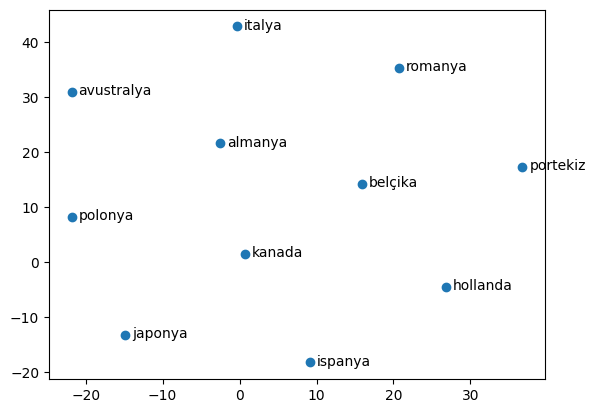

In [47]:
closestwords_tsneplot(model, 'hollanda')